# Arvore decisao simples

<b>Arvore de decisao de classificacao:</b> o valor obtido éa  moda, pois busca analisar as intancias de modo que pode inferir em observacoes anteriores<br>

<b>Arvore de regressao:</b> a resposta desse e a media 

Entropia: é a medida de incerteza nos dados, medida de organizacao dos dados, ela representa o grau de variancia dos dados quando temos uma prporcao das classes muito proximos normalmente teremos entropia proxima a 1=~ 0.95 - 0.99.<BR>
E quando temos divisao de 50% temos entropia de 1.<BR>
E quando temos classe rara ou dados em grande parte em uma classe temos entropias baixas como exemplo 0.47,0.002 <br>

quanto maior entropia maior a desordem

### Formula da Entropia

In [16]:
# ccalculo da entropia, distribuicao tendenciosa
# entropia e a medida da falta de homogenidade
import numpy as np
import math 

probabilidade_sim = 119/153 # 3 sim em um total de 6 observcoes da coluna decisao
probabilidade_nao = 52/100

entropia = -(probabilidade_sim*math.log2(probabilidade_sim)+probabilidade_nao*math.log2(probabilidade_nao))
entropia # quanto mais balanceado mais proximo de 1, Menos balanceado mais proximo de 0

0.7725755158820398

In [17]:
pSim = 530/1000 # distribuicao balanceada
pNao = 470/1000
-(pSim*math.log2(pSim)+pNao*math.log2(pNao)) 

0.9974015885677396

Ganho de informacao

1. calculamos a entropia do no raiz<br>
2. calculamos a entropia de cada ramo<br>
3. calculamos o ganho de informacao<br>
urilizado para determinar o no 

In [18]:
qtd_observacoes =  6
# classe target, ou seja a classificadora
qtd_sim_classe_tgt = 3
qtd_nao_classe_tgt = 3

p_s = qtd_sim_classe_tgt/qtd_observacoes
p_n = qtd_nao_classe_tgt/qtd_observacoes
entropia_NO_Raiz = -(p_s*math.log2(p_s)+p_n*math.log2(p_n))
entropia_NO_Raiz

1.0

In [20]:

# calculando o ganho de informacao, lembrando que o maior valor e o escolhido para ser o no raiz
# aqui ele vai feature por feature caso seja multiclasse e olha as classes, calculando o ganho de informacao
##################
# salarios altos

qtd_observacoes =  3

qtd_sim_no_filho = 2
qtd_nao_no_filho = 1

p_s = qtd_sim_no_filho/qtd_observacoes
p_n = qtd_nao_no_filho/qtd_observacoes
entropia_ramo_alto = -(p_s*math.log2(p_s)+p_n*math.log2(p_n))
entropia_ramo_alto

#################
# baixo
qtd_observacoes =  3

qtd_sim_no_filho = 1
qtd_nao_no_filho = 2

p_s = qtd_sim_no_filho/qtd_observacoes
p_n = qtd_nao_no_filho/qtd_observacoes
entropia_ramo_baixo = -(p_s*math.log2(p_s)+p_n*math.log2(p_n))
entropia_ramo_baixo

##################
qtd_observacoes_no_RAIZ=6
qtd_obsercoes_no_salario_alto = 3
qtd_obsercoes_no_salario_baixo=3 

peso_salario_alto = qtd_obsercoes_no_salario_alto/qtd_observacoes_no_RAIZ
peso_salario_baixo = qtd_obsercoes_no_salario_baixo/qtd_observacoes_no_RAIZ
peso_salario_baixo
Gi = (entropia_NO_Raiz-((peso_salario_alto * entropia_ramo_alto) + (peso_salario_baixo* entropia_ramo_baixo)))
Gi

0.08170416594551044

In [21]:
# quando nao existe outra classificacao dos dados a entropia e 0
# ou seja nao ha desordem nos dados, todos sao iguais 
entropia = -(3/3 * math.log2(3/3))
entropia

-0.0

Indice Gini

Medir impureza dos dados

In [24]:
# indentificar o menor indice gini, quanto mais proximo de 0 mais puro mais homogeneo
# No pai 14 observacoes,9 sim, 5 nao 
# nos ponderamos em relacao ao no Raiz
# 5/14, sao 5 observacoes para aparencia ENSOLARADO na tabela de um total de 14 repostas da Raiz Target
# 1-, casos sim / total de observacoes como ensolarado ^2, casos de nao / total ^2 
# depois basta somar todos os casos teremos o indice 

ensolarado = ((5/14)*((1-((2/5)**2-(3/5)**2))))
nublado =    ((4/14)*((1-((4/4)**2-(0/4)**2))))
chuva   =    ((5/14)*((1-((3/5)**2 - (2/5)**2))))
ensolarado+chuva+nublado

0.7142857142857143

Impureza dos dados<br>
Baixa: quando temos dados homogeneos de maioria em uma classe <br>
Alta: quando temos dados em diversas clases

# Poda 

pre-poda: para o crescimento da arvore<br>
pos-poda: poda com arvore completa<br><br>

Processo: <br>
percore a arvore em profundidade<br>
para cada no percorrido verrifica o valor da soma dos erros no no filho e igual o valor do no pai, se for vira folha 

## Contras

Algoritimo guloso: para cada nivel ele tenta encontrar uma funcao de custo q minimize perda, porem ele nem sempre traz os ultimos nos como otimos(subotimo, tempo O(exp(m))exponecial(polinomial nao existe))<br>
sensivel a ruidos, superajustado<br>
lineares ortogonal:

# Pros

fast predicton: depois deconstruida ordem log O(log(m))<br>
simples

Implementacao

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor


iris = load_iris()
X =  iris.data
y =  iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [54]:
arvore1 = DecisionTreeClassifier(criterion='gini',max_depth=2)
arvore1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pred= arvore1.predict(X_test)

accuracy_score(y_test,pred)

0.9777777777777777

In [56]:
confusion_matrix(y_test,pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

In [57]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [47]:
from sklearn import tree

regras = tree.export_text(arvore1)
print(regras)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.60
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.60
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_0 <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5.95
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: 2



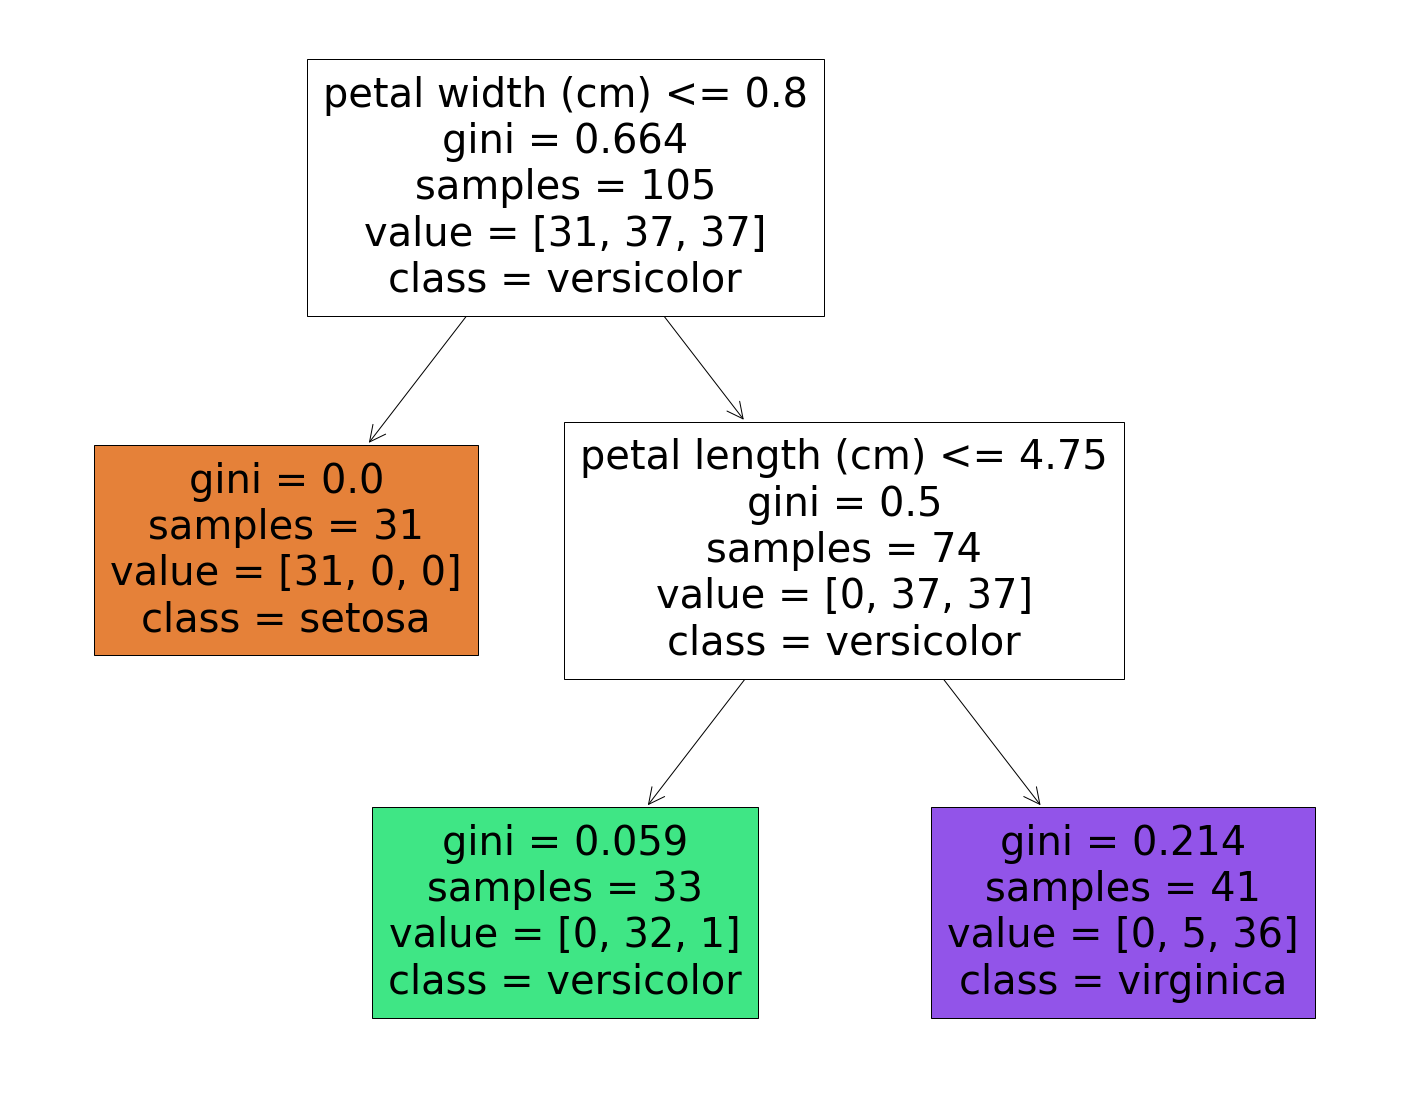

In [58]:
import matplotlib.pyplot  as plt 

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(arvore1, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
# gini: ramos com classes mais frequentes, mais rapido de calcular, utilizado quando precisamos de ramos com maior frequencia
# entropia: leva arvores mais balanceadas, utilizado quando precisamos evitar impacto com dados mais desbalanceados tendenciosos